# Questions to clarify:

Q1: We will select implied volatility based on the closest strike level provided to us. But, do we need to use that closest strike level in our calculation for Black Scholes? Or just the default one provided by the user?

Q2: Is Duration 3 month, user input value or how? Please look at appendix

Q3: Do I need to adjust for dividends in my black scholes. And, if yes, do I need to incorporate ex-dividend date?

Q4: In annualize_time() function, I annualize with the assumption that there are 365 days in a year rather than 242 trading days. Online I read that's the way but want to clarify with someone.

# Observations:

In excel file, the d1 term had a wrong formula as it was not dividing the numerator by (sigma * root(t)) {see picture below}.

Additionally, I don't think you can account for dividend yield by just subtracting the riskfree rate from it. Please see Merton model below

# Main idea:

Options are derivative contracts that give the buyer the right, but not the obligation, to buy or sell the underlying asset at a mutually agreeable price on or before a specified future date.

Option pricing is based on the likelihood that the underlying asset will finish in-the-money (ITM) or with some intrinsic value. The greater this likelihood, the pricier the options contract.

An option premium (aka price of option) consists of 2 components:
1. Intrinsic value
2. Extrinsic value

Therefore, modelled in an equation, we notice:
Option premium = Intrinsic value + Extrinsic value

Intrinsic value is the amount by which the strike price of an option is profitable or in-the-money as compared to the stock's price in the market.

Extrinsic value consists of 2 components:
1. Time value
2. Implied volatility 

Time value is the portion of an option's premium that is attributable to the amount of time remaining until the expiration of the option contract.



Now, consider some factors and how they play out:

With more time to expiration, the chances of a profitable expiration increase, along with the price of the options.

Greater volatility is also favourable as greater the price movements of stock, the more chances those large moves will produce an in-the-money option.

As we notice, volatility is one of the key factors.

**Concept of implied volatility:**

Market participants can look to an option's price in the market and back out the implied volatility (IV) that traders expect the underlying to move.

Implied volatility is the market's view of the likelihood of changes in a given security's price.

It is a metric used by investors to estimate future fluctuations (volatility) of a security's price based on certain predictive factors.

commonly expressed using percentages and standard deviations over a specified time horizon.

Implied volatility approximates the future value of the option, and the option's current value is also taken into consideration.

Implied volatility is different from historical volatility (which measures past market changes and their actual results.)

How Is Implied Volatility Computed?

Since implied volatility is embedded in an option's price, one needs to re-arrange an options pricing model formula to solve for volatility instead of the price (since the current price is known in the market).

# Theory of Black scholes pricing model:

Formula for calculating the price (C) of a European call option which is:

C = [ S * N(d₁) ] - [ K * e<sup>(-r * T)</sup> * N(d₂) ] 

Formula for calculating the price (P) of a European put option which is:

P = [ K * e<sup>(-r * T)</sup> * N(-d₂) ] - [ S * N(-d₁)] 

Or,

P = [ K * e<sup>(-r * T)</sup> * (1- N(d₂)) ] - [ S * (1 - N(d₁))]

since, the standard normal distribution N(−d) can be written as (1−N(d))

- **d₁** = (ln(S / K) + (r + (σ²) / 2) * T) / (σ * √T)
- **d₂** = (ln(S / K) + (r - (σ²) / 2) * T) / (σ * √T)
or,
- **d₂** = d₁ - σ * √T

The Black-Scholes formula is used to calculate and output the theoretical estimated price (premium) of a European call/put option.

It essentially prices options using risk adjusted probabilities and opportunity cost of paying a premium for the option.

===============================================================================================================

It takes into account several variables:

- **S<sub>t</sub>**: The current price of the underlying asset (e.g., stock).
- **K**: The strike price of the option.
- **r**: The risk-free rate (annual rate, as a decimal).
- **t**: The time until the option's expiration (in years).
- **σ**: The volatility of the underlying asset's returns (annualized, as a decimal).

And:
- **N**: Cumulative distribution function for a standard normal distribution (i.e. Probability of random variable is less than or equal to x)
- **d1**: Conditional probability that if the spot price at maturity is above strike price, what will be its expected value in relation to current spot price.
- **d2**: Probability that the option will expire in the money i.e. spot above strike for a call.

Therefore, we can think of the terms N(d1) and N(d2) as:
- **N(d1)**: Future value of the stock if and only if the stock price is above the strike price at expiration.
- **N(d2)**: Expected value (i.e. probability adjusted value) of having to pay out the strike price for a call.

Therefore, the formula for calculating the price (C) of a European call option which is:

C = [ S * N(d₁) ] - [ K * e<sup>(-r * T)</sup> * N(d₂) ] 

Can be thought of as the following in rough terms:

C = [ Current stock price weighted by some type of probability of exercising call option and obtaining its future value] - [ Exercise price being discounted back to present weighted by the probability we exercise our option and pay the strike price] 

and even more simply as:

C = [What you get] - [What you pay]

===============================================================================================================

Some additional notes:

The higher the stock price relative to the exercise price, the more likely we will exercise the option. This can be seen in ln(S/K) term as part of d1 and d2. And if d1 and d2 go up, larger the input to cumulative distribution function and higher chance we exercise the option and greater value of option.

Higher the volatility, higher the option price. Higher the standard deviation of the log returns, will make d1 go up and d2 go down (as it is being subtracted). Therefore, the value of call option will be higher.

Options are more valuable when you are dealing with higher volatility. 

Black Scholes model was created for a European call options, which can be exercised only at exercise date. We can do something similar for an American call option, which can be exercised at any point.

===============================================================================================================

Note:

We can also calculate the put option if we have the call option via the **Put-call parity:** formula as shown below:

V<sub>p</sub> = V<sub>c</sub> + X/(e<sup>r * t</sup>) - P<sub>0</sub>

where:

- **V<sub>p</sub>**: Value of put option
- **V<sub>c</sub>**: Value of call option
- **X/(e<sup>r * t</sup>)**: Present value of exercise price using continuous compounding
- **t**: Time until the option's expiration (in years).
- **S (P<sub>0</sub>)**: Spot price of underlying asset

Additionally, for european options with same strike price and time to expiration, our parity relationship can be as follows:

[Call premium - put premium] = [Forward price - strike price]

Note: [Forward price - Strike price] = Present Value

# Theory of Option Greeks:

There are different option greeks that account for different variables like:
 1. Price
 2. Time
 3. Implied Volatility
 
**Note:**

$\Phi$ = cdf, i.e. cumulative distribution function

$\phi$ = pdf, i.e. probability distribution function


**Delta option greek:**

$\Delta = \frac{\partial V}{\partial S}$

$\Delta_{call} = \Phi(d1)$

$\Delta_{put} = -\Phi(-d1)$

Delta often has the biggest impact on an option value.

It identifies how much the option's premium may change, if the underlying price changes by $1.

Delta can be used for checking the probability of an option expiring in-the-money.

Therefore, looking at the application of delta, if an option has delta of $0.40, it can be thought of as:

1. Option increases by $0.40 if underlying price increases by $1.00

2. Option has 40% chance of expiring in-the-money

Delta doesn't have a constant rate of change. It grows as option moves further in-the-money and shrinks if it moves further out-of-money.

**Gamma option greek:**

$\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2}$

$\Gamma = \frac{\phi(d1)}{S\sigma\sqrt{\tau}}$

Gamma measures delta's rate of change.

If option has delta of 0.40, then we expect the premium will change $0.40 with the dollar move in the underlying. 

To figure out the impact of the next dollar move, add delta and gamma to find the new delta. Therefore, we expect the new delta to be 0.45.

**Theta option greek:**

$\Theta = -\frac{\partial V}{\partial \tau}$

$\Theta_{call} = -\frac{S\phi(d1)\sigma}{2\tau} – rK\exp{(-rT)}\Phi(d2)$

$\Theta_{put} = -\frac{S\phi(d1)\sigma}{2\tau} + rK\exp{(-rT)}\Phi(-d2)$

Theta estimates how much values slips from an option in each passing day.

If an option has theta of -0.04, it will lose $0.04 value everyday. 

Rememeber, time decay works against buyers and for sellers.

**Vega option greek:**

$\upsilon = \frac{\partial V}{\partial \sigma}$

$\upsilon = S\phi(d1)\sqrt{\tau}$

Vega estimates how much premium will change for each 1% point change in implied volatility.

If option has vega of 0.03 and implied volatility decreases 1%, the premium will drop by $0.03.

**Rho option greek:**

$\rho = \frac{\partial V}{\partial r}$

$\rho_{call} = K\tau\exp{(-rT)}\Phi(d2)$

$\rho_{put} = -K\tau\exp{(-rT)}\Phi(-d2)$

Rho identifies how much an option's premium may move if interest rates change. 

Because interest rates change slowly, they have a smaller impact on options trading. 

# Adjusting dividends in Black Scholes model

Look at this pdf around page 90 to learn more about black scholes:

https://pages.stern.nyu.edu/~adamodar/pdfiles/val3ed/c05.pdf

If ex-dividend date is after expiry of option, then don't consider dividend adjustment in model.

However, if ex-dividend date is before expiry of option, then you need to follow one of these dividend adjustments in your model.

## Modified BS model approach

This approach works best for short-term options:

Modified stock price = Current stock price - Present value of expected dividends during the life of the option

Subtract Present Value of expected dividend from stock price using continuous discounting:

1. S = $75 (Stock price)

2. D = $0.50 per share (quarterly dividend). Assume ex-dividend date is 80 days from today. So t = 80/365 = 0.2192

3. r = 6.1% (riskfree rate in decimal)

4. Std. dev = 0.30 (annualized)

5. T = 90/365 = 0.2466 years

Step 1: Subtract present value of expected dividend from stock price using continuous compounding

S* = S - (D * e^(-r * t))

Then use this adjusted stock price as your stock price (i.e. spot price) in Black Scholes model for:

d₁: (ln(**S*** / K) + (r + (σ²) / 2) * T) / (σ * √T)

Value of call option (C) = [ **S*** * N(d₁) ] - [ K * e<sup>(-r * T)</sup> * N(d₂) ] 

## Merton Model

From an intuitive standpoint, the adjustments have two effects. First, the value of the asset is discounted back to the present at the dividend yield to take into account the expected drop in asset value resulting from dividend payments.

Second, the interest rate is offset by the dividend yield to reflect the lower carrying cost from holding the asset (in the replicating portfolio). The net effect will be a reduction in the value of calls estimated using this model.

This approach works best for long-term options:

Since it becomes less practical to estimate the present value of dividends the longer the option life, an alternate approach can be used.

If the dividend yield (y = Dividends/Current value of the asset) on the underlying asset is expected to remain unchanged during the life of the option, the Black-Scholes model can be modified to take dividends into account.

Step 1: Calculate annualized dividend yield

d = ( Quarterly dividend/Stock price ) * 4 

We are doing times 4 so that we can annualize quarterly dividend.

Step 2: Substitute in the model as such

C* = [e<sup>-**d***t</sup> * S * N(d₁) ] - [ K * e<sup>(-r * T)</sup> * N(d₂) ] 

d₁: ln(**S*** / K) + (r - **d** + (σ²) / 2) * T) / (σ * √T)

## Stack exchange

https://quant.stackexchange.com/questions/14855/option-pricing-where-to-get-the-dividend-yield-from

Utilise put-call parity and reverse out the implied dividend yield:

F(T,K) = C(T,K) - P(T,K)

F(T) = S(t)*e^[(r-d)*(T-t)]

# Formula for implementing Black Scholes Option Pricing Model (referencing excel sheet):

## Creating template excel file

In [ ]:
# File path where template is
template_path = "template/template.xlsx"
destination_path = "data.xlsx"

In [ ]:
def get_tickers():
    tickers = []
    while True:
        ticker = input("Please enter name for ticker (in Bloomberg Ticker format) or 'exit' to stop: ")
        if ticker.lower() == 'exit':
            break
        tickers.append(ticker)
    return tickers

def create_sheets_from_template(tickers, template_path, destination_path):
    # Load the template workbook
    wb = load_workbook(template_path)
    template_sheet = wb.active
    template_data = [row for row in template_sheet.iter_rows(values_only=True)]
    
    for ticker in tickers:
        
        # Create a new sheet and name it after the first word in the ticker string
        sheet_name = ticker.split()[0]
        ws = wb.create_sheet(title=sheet_name)
        
        # Populate the new sheet with data from the template
        for row in template_data:
            ws.append(row)
        
        # Update the ticker name in cell B2
        ws['B2'] = ticker
    
    # Remove the original template sheet
    wb.remove(template_sheet)
    
    # Save the modified workbook
    save_path = destination_path
    wb.save(save_path)

In [ ]:
tickers = get_tickers()

In [ ]:
save_path = create_sheets_from_template(tickers, template_path, destination_path)

# Code start

In [1]:
# Importing necessary libraries
import numpy as np
import scipy.stats as se
import openpyxl
import yfinance as yf
import pandas as pd
import shutil
import opstrat as op
import matplotlib.pyplot as plt
from tabulate import tabulate

from openpyxl import Workbook, load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

In [2]:
file_path = "FCN ELON Implied Vols.xlsx"

## Helper functions

In [3]:
def copy_orignal_file(old_file_path):
    new_file_path = f"orignal_{old_file_path}"
    shutil.copy2(old_file_path, new_file_path)
    print(f"Successfully copied {old_file_path} to {new_file_path}")

In [4]:
copy_orignal_file(file_path)

Successfully copied FCN ELON Implied Vols.xlsx to orignal_FCN ELON Implied Vols.xlsx


In [5]:
# Function to get worksheet names from excel file
def get_worksheet_names(file_path):
    try:
        # Open the Excel workbook
        workbook = openpyxl.load_workbook(file_path, read_only=True)

        # Get the names of all worksheets and store them in a list
        worksheet_names = workbook.sheetnames

        return worksheet_names

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []

In [6]:
excel_file_path = "FCN ELON Implied Vols.xlsx"
worksheet_names = get_worksheet_names(excel_file_path)
print(worksheet_names)

['TSLA', 'NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'AMD']


In [7]:
# Function to annualize time
def annualize_time():
    # Enter time to expiration
    t = float(input("Enter the time to expiration of option: "))

    # Enter unit of time to expiration
    unit = input("Enter the unit of time to expiration (days/months/years): ").strip().lower()
    
    while unit not in ["days", "months", "years"]:
        print("Invalid unit. Please enter 'days', 'months', or 'years'.")
        unit = input("Enter the unit of time to expiration (days/months/years): ").strip().lower()
        
    # Perform annualization calculation
    if unit == "days":
        t_annualized = t / 365.0  #Use 252 days if you want to follow trading convention
    elif unit == "months":
        t_annualized = t / 12.0  #Use 11.5238 months if you want to follow trading convention
    else:
        t_annualized = t

    return t_annualized

In [8]:
# Function to annualize time
def annualize_time_252():
    
    # Enter time to expiration
    t = float(input("Enter the time to expiration of option: "))

    # Enter unit of time to expiration
    unit = input("Enter the unit of time to expiration (days/years): ").strip().lower()
    
    while unit not in ["days", "months", "years"]:
        print("Invalid unit. Please enter 'days' or 'years'.")
        unit = input("Enter the unit of time to expiration (days/years): ").strip().lower()
        
    # Perform annualization calculation
    if unit == "days":
        t_annualized = t / 252.0  #Use 252 days if you want to follow trading convention
    else:
        t_annualized = t

    return t_annualized

In [9]:
# Function to obtain riskfree rate
def get_riskfree_rate():
    # Define the symbol for the 10-year Treasury bond
    treasury_bond_symbol = "^TNX" 
    
    # Create a Ticker object for the Treasury bond
    treasury_bond = yf.Ticker(treasury_bond_symbol)
    
    # Get historical data for the Treasury bond yiel
    historical_data = treasury_bond.history(period="1y") 
    
    # Get the most recent yield (risk-free rate
    risk_free_rate = historical_data["Close"].iloc[-1] / 100  #Convert percentage to decimal
    
    return risk_free_rate

In [10]:
import datetime

def is_valid_date(date_str):
    try:
        # Parse the input date string to a datetime object
        input_date = datetime.datetime.strptime(date_str, "%d/%m/%Y")
                
        # This will make sure we move to the next month (no matter how many days in)
        last_day_of_month = datetime.datetime(input_date.year, input_date.month, 1) + datetime.timedelta(days=32)
        
        # Then, we reposition to day 1. And, subtract 1 day to get date of last month
        last_day_of_month = last_day_of_month.replace(day=1) - datetime.timedelta(days=1)
        
        # Check if the input date is the last day of the specified month
        return input_date.date() == last_day_of_month.date()
    
    except ValueError:
        return False

In [11]:
def calculate_strike_percentage(strike_value, s):
    initial_strike_level = (strike_value/s) * 100
    return float(initial_strike_level)

In [12]:
# def calculate_ex_dividend_date()

Step 1: Subtract present value of expected dividend from stock price using continuous compounding

S* = S - (D * e^(-r * t))

In [13]:
# def adjust_stock_price_for_dividend_short_term_option(stock_price_input, t):
#     s = stock_price_input 

## Cleaning excel file - Avoid this cell block if you are re-running file again

Strangely the below code changes #NAME to date, without explicit instruction. I don't understand how.

In [14]:
import pandas as pd

def clean_data(df):
    
    # Drop rows with all NaN values at the top of the DataFrame
    df = df.dropna(axis=0, how='all')
    
    # Drop columns with all NaN values at the top of the DataFrame
    df = df.dropna(axis=1, how='all')
    
    # Identify the row containing the first non-NaN value in the "Ticker" column
    ticker_row_index = df['Ticker'].first_valid_index()
    
    # Save it to bloomberg_ticker variable (Note: This variable is not being used elsewhere)
    bloomberg_ticker = ticker_row_index
    
    # Drop the Ticker column
    df = df.drop('Ticker', axis=1)
    
    # Extract date columns
    date_columns = df.select_dtypes(include=['datetime64']).columns
    
    # Convert the date columns to the desired "DD/MM/YYYY" format
    for col in date_columns:
        df[col] = df[col].dt.strftime('%d/%m/%Y')
    
    return df

In [15]:
# Read all sheets from the Excel file
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Clean each sheet and store in a dictionary
cleaned_sheets = {sheet_name: clean_data(df) for sheet_name, df in all_sheets.items()}

# Write all cleaned dataframes back to the same Excel file, overwriting the original sheets
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

## User input

In [16]:
# Exemplar of variables being defined
# ticker = "TSLA"
# s = 30
# k = 40
# r = 0.01
# #vol = 0.30
# t = 240/365

while True:
    ticker = str(input("Enter the ticker for underlying equity: ").strip())
    
    while ticker not in worksheet_names:
        print(f"Ticker '{ticker}' not found in Excel file: {excel_file_path}. Please enter a valid ticker name.")
        print(f"These are the valid ticker names {worksheet_names}")
        ticker = str(input("Enter the ticker for underlying equity: ").strip())
    
    s = float(input("Enter the value for Stock price: "))
    
    #k = float(input("Enter the value for Strike price (as % of stock price): ").strip('%'))

    # while loop for strike price
    while True:
        strike_input = input("Do you have a dollar value for strike price? If yes, type yes. Else, type no and subsequently provide it as a % of stock price")
        
        if strike_input == 'yes':
            strike_value_input = float(input("Enter a dollar value for strike price"))
            strike_level_input = calculate_strike_percentage(strike_value_input, s)
            break
            
        elif strike_input == 'no':
            strike_level_input = float(input("Enter the strike price as a % of stock price").strip('%'))
            break
            
        else: 
            print("\nInvalid input. Please enter 'yes' or 'no' to confirm.")

            
    # While loop for riskfree rate
    while True:
        user_riskfree = str(input("Do you have a riskfree rate to input? If yes, type yes. Else, type 'no' and a default riskfree rate will be used "))
        
        if user_riskfree == 'yes':
            r = float(input("Enter a risk-free rate (in decimal format): "))
            break
        
        elif user_riskfree == 'no':
            r = get_riskfree_rate()
            break
        
        else: 
            print("\nInvalid input. Please enter 'yes' or 'no' to confirm.")
            
    t = annualize_time()
        
    # While loop for date
    while True:
        try:
            date = input("Enter date when you want to calculate the price of the option (in DD/MM/YYYY format): ")

            if is_valid_date(date):
                break
                
            else:
                print("Invalid date. Please enter the last day of the specified month in DD/MM/YYYY format.")
                
        except ValueError:
            print("Invalid input. Please enter a date in DD/MM/YYYY format.")
    

    # Print a summary of all variables
    print("\nSummary:")
    print(f"Ticker: {ticker}")
    print(f"Stock price: {s}")
    print(f"Strike price (as % of Stock Price): {strike_level_input}")
    print(f"Risk-free rate: {r}")
    print(f"t (time to expiration in years): {t}")
    print(f"Date when price of option is calculated: {date}")
    
    # While loop for confirmation of content
    while True:
        confirmation = input("\nIs the above information correct? (yes/no): ").strip().lower()

        if confirmation == "yes":
            # Proceed with further calculations or operations
            print("\nThank you! Proceeding with calculations...")
            break  # Exit the loop if the user confirms
            
        elif confirmation == "no":
            # User wants to re-enter information, so continue the loop
            print("\nPlease re-enter the information.")
            break # Exit the loop if the user confirms
        
        else:
            print("\nInvalid input. Please enter 'yes' or 'no' to confirm.")
            
    # Exit the outer loop if the user confirms
    if confirmation == "yes":
        break

Enter the ticker for underlying equity: TKSKA
Ticker 'TKSKA' not found in Excel file: FCN ELON Implied Vols.xlsx. Please enter a valid ticker name.
These are the valid ticker names ['TSLA', 'NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'AMD']
Enter the ticker for underlying equity: NVDA
Enter the value for Stock price: 460.2
Do you have a dollar value for strike price? If yes, type yes. Else, type no and subsequently provide it as a % of stock priceyes
Enter a dollar value for strike price506.22
Do you have a riskfree rate to input? If yes, type yes. Else, type 'no' and a default riskfree rate will be used yes
Enter a risk-free rate (in decimal format): 0.0196
Enter the time to expiration of option: 109
Enter the unit of time to expiration (days/months/years): days
Enter date when you want to calculate the price of the option (in DD/MM/YYYY format): 31/06/2023
Invalid date. Please enter the last day of the specified month in DD/MM/YYYY format.
Enter date when you want to calculate the price

## Adjusting stock price for dividend: Short-term option

In [17]:
# adjust_stock_price_for_dividend_short_term_option(stock_price_input, t)

## Extracting volatility levels

In [18]:
def extract_header(strike_price, ticker):
    
    df = pd.read_excel(excel_file_path, sheet_name = ticker)
    
    # Extract headers containing "IMPVOL"
    impvol_headers = [col for col in df.columns if "IMPVOL" in col]
        
    # Extract percentage levels and convert to float
    percentage_levels = []
    
    for header in impvol_headers:
        # Split by '_' and then by '%'
        percentage = header.split("_")[2].split("%")[0]
        percentage_levels.append(float(percentage))
    
    # Find the closest percentage level to the user value
    closest_value = min(percentage_levels, key=lambda x: abs(float(x) - strike_price))
            
    # Find all values with the same absolute difference
    closest_values = [value for value in percentage_levels if abs(value - strike_price) == abs(closest_value - strike_price)]
    
    # Check if there are two possible values with the same absolute difference
    if len(closest_values) == 2:
        print("Two possible values for implied volatility as absolute value is the same.")
        print(f" Possible implied volatility value 1: {closest_values[0]}")
        print(f" Possible implied volatility value 2: {closest_values[1]}")

    # Find the corresponding header
    for header in impvol_headers:
        if str(closest_value) in header or str(int(closest_value)) in header:
            return header, closest_value

In [19]:
volatility_header, strike_level = extract_header(strike_level_input, ticker)
print(f"\nImplied volatility header to be used: {volatility_header}")
print(f"Strike level we will use: {strike_level}")


Implied volatility header to be used: 3MTH_IMPVOL_110.0%MNY_DF
Strike level we will use: 110.0


## Find volatility for particular date

In [20]:
def obtain_volatility(header, ticker, date):
    df = pd.read_excel(excel_file_path, sheet_name = ticker)
    
    selected_value = df[df[volatility_header] == date]
    
    # Obtain the index of the selected_value
    selected_index = selected_value.index[0]
    
    # Obtain the index of the selected_value
    selected_index = selected_value.index[0]  # Assuming there is only one matching row

    # Select the value in the next column but same row
    final_volatility_value = df.iloc[selected_index, df.columns.get_loc(header) + 1]
    
    return final_volatility_value

In [21]:
vol = obtain_volatility(volatility_header, ticker, date)

In [22]:
print(vol)

50.2236


## Compute strike

In [23]:
def compute_strike(strike_level, s):
    strike_value = (strike_level/100) * s
    return strike_value

In [24]:
final_strike_value = compute_strike(strike_level, s)

In [25]:
print(final_strike_value)

478.68700000000007


# Formula for implementing Black Scholes Option Pricing Model (Manual implementation):

Modifications based on understanding answer to question 1:

If strike value is just user input, use strike_value_input

Else, use final_strike_value, if it changes based on the excel headers

In [26]:
print(s,strike_value_input,r,vol,t)

435.17 500.0 0.055 50.2236 0.29315068493150687


In [27]:
vol_new = vol/100

In [28]:
print(s,strike_value_input,r,vol_new,t)

435.17 500.0 0.055 0.502236 0.29315068493150687


In [29]:
# Defining default variables
# s = 30
# k = 40
# r = 0.01
# vol_new = 0.478
# t = 240/365

In [30]:
# Defining function for d1 parameter
def d1(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry):
    """
    Calculate d1 parameter for Black-Scholes formula.
    
    Parameters:
        spot_price (float): Current price of the underlying asset (spot price).
        strike_price (float): Strike price of the option.
        risk_free_rate (float): Annualized risk-free rate (as a decimal).
        volatility (float): Volatility of underlying asset's returns (annualized, as a decimal).
        time_to_expiry (float): Time until option's expiration (in years).
    
    Returns:
        float: d1 parameter.
    """
    numerator = np.log(spot_price / strike_price) + (risk_free_rate + (volatility ** 2) / 2) * time_to_expiry
    denominator = volatility * np.sqrt(time_to_expiry)
    return numerator / denominator

# Defining function for d2 parameter
def d2(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry):
    """
    Calculate d2 parameter for Black-Scholes formula.
    
    Parameters:
        spot_price (float): Current price of the underlying asset (spot price).
        strike_price (float): Strike price of the option.
        risk_free_rate (float): Annualized risk-free rate (as a decimal).
        volatility (float): Volatility of underlying asset's returns (annualized, as a decimal).
        time_to_expiry (float): Time until option's expiration (in years).
    
    Returns:
        float: d2 parameter.
    """
    return d1(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry) - volatility * np.sqrt(time_to_expiry)

# Defining Black Scholes option pricing model
def blackScholes(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry, option_type="C"):
    """
    Calculate the price of a European call or put option using the Black-Scholes model.
    
    Parameters:
        spot_price (float): Current price of the underlying asset (spot price).
        strike_price (float): Strike price of the option.
        risk_free_rate (float): Annualized risk-free rate (as a decimal).
        volatility (float): Volatility of underlying asset's returns (annualized, as a decimal).
        time_to_expiry (float): Time until option's expiration (in years).
        option_type (str): Type of option ("C" for call, "P" for put).
    
    Returns:
        float: Option price.
    """
    try:
        if option_type == "C":
            price = (spot_price * se.norm.cdf(d1(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry))) - (strike_price * np.exp(-risk_free_rate * time_to_expiry) * se.norm.cdf(d2(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry)))
            return price
        elif option_type == "P":
            price = (strike_price * np.exp(-risk_free_rate * time_to_expiry) * se.norm.cdf(-d2(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry))) - (spot_price * se.norm.cdf(-d1(spot_price, strike_price, risk_free_rate, volatility, time_to_expiry)))
            return price
        else:
            raise ValueError("Invalid option_type. Use 'C' for call or 'P' for put.")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")        

## Calling function for Call options

In [31]:
# variable to store call value
call_value_manual = blackScholes(s,strike_value_input,r,vol_new,t, option_type = "C")

In [32]:
print("Option price, evaluated using Black Scholes pricing model is", blackScholes(s,strike_value_input,r,vol_new,t, option_type = "C"))

Option price, evaluated using Black Scholes pricing model is 26.70474019282608


In [33]:
print("Option price, evaluated using Black Scholes pricing model is", round(blackScholes(s,strike_value_input,r,vol_new,t, option_type = "C"),2))

Option price, evaluated using Black Scholes pricing model is 26.7


## Calling function for Put options

In [34]:
# variable to store put value
put_value_manual = blackScholes(s,strike_value_input,r,vol_new,t, option_type = "P")

In [35]:
print("Option price, evaluated using Black Scholes pricing model is", blackScholes(s,strike_value_input,r,vol_new,t, option_type = "P"))

Option price, evaluated using Black Scholes pricing model is 83.5377385772187


In [36]:
print("Option price, evaluated using Black Scholes pricing model is", round(blackScholes(s,strike_value_input,r,vol_new,t, option_type = "P"),2))

Option price, evaluated using Black Scholes pricing model is 83.54


## Defining function for put-call parity

V<sub>p</sub> = V<sub>c</sub> + X/(e<sup>r * t</sup>) - P<sub>0</sub>

In [37]:
def put_call_parity(s,strike_value_input,call_value_manual):
    put_value = call_value_manual + (strike_value_input/(np.exp(r*t))) - s
    
    return put_value

In [38]:
print("Put option premium evaluted from call option premium using put-call parity is", put_call_parity(s,strike_value_input,call_value_manual))

Put option premium evaluted from call option premium using put-call parity is 83.53773857721859


## Greek values - Call option

**Note:**

$\Phi$ = cdf, i.e. cumulative distribution function

$\phi$ = pdf, i.e. probability distribution function

${\tau}$ is same as Time

**Delta option greek:**

$\Delta = \frac{\partial V}{\partial S}$

$\Delta_{call} = \Phi(d1)$

$\Delta_{put} = -\Phi(-d1)$

**Gamma option greek:**

$\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2}$

$\Gamma = \frac{\phi(d1)}{S\sigma\sqrt{\tau}}$

**Vega option greek:**

$\upsilon = \frac{\partial V}{\partial \sigma}$

$\upsilon = S\phi(d1)\sqrt{\tau}$

**Theta option greek:**

$\Theta = -\frac{\partial V}{\partial \tau}$

$\Theta_{call} = -\frac{S\phi(d1)\sigma}{2\sqrt{\tau}} – rK\exp{(-rT)}\Phi(d2)$

$\Theta_{put} = -\frac{S\phi(d1)\sigma}{2\sqrt{\tau}} + rK\exp{(-rT)}\Phi(-d2)$

**Library calculation for theta option is using this instead:**

$\Theta_{put} = (-\frac{S\phi(d1)\sigma}{2\sqrt{2 * pi * \tau}} + rK\exp{(-rT)}\Phi(-d2))/365$

divide by 365 then converts annual value to value for single trading day

**Rho option greek:**

$\rho = \frac{\partial V}{\partial r}$

$\rho_{call} = K\tau\exp{(-rT)}\Phi(d2)$

$\rho_{put} = -K\tau\exp{(-rT)}\Phi(-d2)$

In [39]:
s = 460.2

strike_value_input = 400.0

r = 0.0196

vol_new = 0.446325

t = 0.29863013698630136

In [40]:
def call_delta(s,strike_value_input,r,vol_new,t):
    return se.norm.cdf(d1(s,strike_value_input,r,vol_new,t))

def call_gamma(s,strike_value_input,r,vol_new,t):
    return se.norm.pdf(d1(s,strike_value_input,r,vol_new,t))/(s * vol_new * np.sqrt(t))

def call_vega(s,strike_value_input,r,vol_new,t):
    return 0.01 * (s * se.norm.pdf(d1(s,strike_value_input,r,vol_new,t)) * np.sqrt(t))
    
def call_theta(s,strike_value_input,r,vol_new,t):
    (- (s * se.norm.pdf(d1(s, strike_value_input, r, vol_new, t)) * vol_new / np.sqrt(8 * np.pi * t)) - r * strike_value_input * np.exp(-r * t) * se.norm.cdf(d2(s, strike_value_input, r, vol_new, t))) / 365
    
def call_rho(s,strike_value_input,r,vol_new,t):
    return 0.01 * (strike_value_input * t * np.exp(- r * t) * se.norm.cdf(d2(s,strike_value_input,r,vol_new,t)))

In [41]:
call_delta_manual = call_delta(s,strike_value_input,r,vol_new,t)
call_gamma_manual = call_gamma(s,strike_value_input,r,vol_new,t)
call_vega_manual = call_vega(s,strike_value_input,r,vol_new,t)
call_theta_manual = call_theta(s,strike_value_input,r,vol_new,t)
call_rho_manual = call_rho(s,strike_value_input,r,vol_new,t)

In [42]:
print(f" Delta value for call option is:", call_delta_manual)
print(f" Gamma value for call option is:", call_gamma_manual)
print(f" Vega value for call option is:", call_vega_manual)
print(f" Theta value for call option is:", call_theta_manual)
print(f" Rho value for call option is:", call_rho_manual)

 Delta value for call option is: 0.7644693283844931
 Gamma value for call option is: 0.0027411994298146398
 Vega value for call option is: 0.7737821529230542
 Theta value for call option is: None
 Rho value for call option is: 0.8114113711063561


## Greek value - Put options

In [43]:
def put_delta(s,strike_value_input,r,vol_new,t):
    return - ( se.norm.cdf(-d1(s,strike_value_input,r,vol_new,t)) )

def put_gamma(s,strike_value_input,r,vol_new,t):
    return se.norm.pdf(d1(s,strike_value_input,r,vol_new,t))/(s * vol_new * np.sqrt(t))

def put_vega(s,strike_value_input,r,vol_new,t):
    return 0.01 * (s * se.norm.pdf(d1(s,strike_value_input,r,vol_new,t)) * np.sqrt(t))

def put_theta(s,strike_value_input,r,vol_new,t):
    return (-((s * vol_new * np.exp(-d1(s,strike_value_input,r,vol_new,t)**2 / 2)) / (np.sqrt(8 * np.pi * t))) + (r * strike_value_input * np.exp(-r * t) * se.norm.cdf(-d2(s,strike_value_input,r,vol_new,t)))) / 365
    
def put_rho(s,strike_value_input,r,vol_new,t):
    return 0.01 * ( - ( strike_value_input * t * np.exp(- r * t) * se.norm.cdf(-(d2(s,strike_value_input,r,vol_new,t))) ) )

In [44]:
put_delta_manual = put_delta(s,strike_value_input,r,vol_new,t)
put_gamma_manual = put_gamma(s,strike_value_input,r,vol_new,t)
put_vega_manual = put_vega(s,strike_value_input,r,vol_new,t)
put_theta_manual = put_theta(s,strike_value_input,r,vol_new,t)
put_rho_manual = put_rho(s,strike_value_input,r,vol_new,t)

In [45]:
print(f" Delta value for call option is:", put_delta_manual)
print(f" Gamma value for call option is:", put_gamma_manual)
print(f" Vega value for call option is:", put_vega_manual)
print(f" Theta value for call option is:", put_theta_manual)
print(f" Rho value for call option is:", put_rho_manual)

 Delta value for call option is: -0.2355306716155069
 Gamma value for call option is: 0.0027411994298146398
 Vega value for call option is: 0.7737821529230542
 Theta value for call option is: -0.1516576670258655
 Rho value for call option is: -0.37613788997437025


# Summary for Comparision - Manual method

In [46]:
d1_result = d1(s,strike_value_input,r,vol_new,t)
d2_result = d2(s,strike_value_input,r,vol_new,t)
n_d1_result = se.norm.cdf(d1_result)
n_d2_result = se.norm.cdf(d2_result)

In [47]:
negative_d1_result = -d1(s,strike_value_input,r,vol_new,t)
negative_d2_result = -d2(s,strike_value_input,r,vol_new,t)
n_negative_d1_result = se.norm.cdf(negative_d1_result)
n_negative_d2_result = se.norm.cdf(negative_d2_result)

In [48]:
# Your data
main_data_manual = [
    ["Summary (manual method)", "Stats"],
    ["Ticker:", ticker],
    ["Stock price:", s],
    ["Strike price used in calculation finally:", strike_value_input],
    ["Risk-free rate:", r],
    ["Time left till expiration:", t],
    ["Volatility:", vol_new],
    ["Value of call option:", call_value_manual],
    ["d1 value:", d1_result],
    ["d2 value:", d2_result],
    ["n_d1 value:", n_d1_result],
    ["n_d2 value:", n_d2_result],
    ["Delta value for call option:", call_delta_manual],
    ["Gamma value for call option:", call_gamma_manual],
    ["Vega value for call option:", call_vega_manual],
    ["Theta value for call option:", call_theta_manual],
    ["Rho value for call option:", call_rho_manual],
    ["Value of put option:", put_value_manual],
    ["-d1 value:", negative_d1_result],
    ["-d2 value:", negative_d2_result],
    ["n_-d1 value:", n_negative_d1_result],
    ["n_-d2 value:", n_negative_d2_result],
    ["Delta value for put option:", put_delta_manual],
    ["Gamma value for put option:", put_gamma_manual],
    ["Vega value for put option:", put_vega_manual],
    ["Theta value for put option:", put_theta_manual],
    ["Rho value for put option:", put_rho_manual],
]

# Print the table
main_table_manual = tabulate(main_data_manual, tablefmt="fancy_grid")
print(main_table_manual)

╒═══════════════════════════════════════════╤═══════════════════════╕
│ Summary (manual method)                   │ Stats                 │
├───────────────────────────────────────────┼───────────────────────┤
│ Ticker:                                   │ NVDA                  │
├───────────────────────────────────────────┼───────────────────────┤
│ Stock price:                              │ 460.2                 │
├───────────────────────────────────────────┼───────────────────────┤
│ Strike price used in calculation finally: │ 400.0                 │
├───────────────────────────────────────────┼───────────────────────┤
│ Risk-free rate:                           │ 0.0196                │
├───────────────────────────────────────────┼───────────────────────┤
│ Time left till expiration:                │ 0.29863013698630136   │
├───────────────────────────────────────────┼───────────────────────┤
│ Volatility:                               │ 0.446325              │
├───────────────────

In [49]:
other_data_manual = [
    ["Summary (manual method)", "Other stats"],
    ["Strike price input by user initially:", strike_level_input],
    ["Closest strike level (% of stock price) to be used by our system:", strike_level],
    ["Strike value ($) based on user input:", strike_value_input],
    ["Strike value ($) based on closest strike level:", final_strike_value],
    ["Implied volatility header used in excel sheet:", volatility_header],
    ["Volatility to be used:", vol_new]
]

# Print the table
other_table_manual = tabulate(other_data_manual, tablefmt="fancy_grid")
print(other_table_manual)

╒═══════════════════════════════════════════════════════════════════╤══════════════════════════╕
│ Summary (manual method)                                           │ Other stats              │
├───────────────────────────────────────────────────────────────────┼──────────────────────────┤
│ Strike price input by user initially:                             │ 114.89762621504241       │
├───────────────────────────────────────────────────────────────────┼──────────────────────────┤
│ Closest strike level (% of stock price) to be used by our system: │ 110.0                    │
├───────────────────────────────────────────────────────────────────┼──────────────────────────┤
│ Strike value ($) based on user input:                             │ 400.0                    │
├───────────────────────────────────────────────────────────────────┼──────────────────────────┤
│ Strike value ($) based on closest strike level:                   │ 478.68700000000007       │
├─────────────────────────────

# Formula for implementing Black Scholes Option Pricing Model (Opstrat library):

In [50]:
# redefining variables according to specification

strike_price = strike_value_input # Spot price
spot_price = s   # Current stock price
riskfree_rate = (r * 100) # Risk-free rate 
time_to_expiry = (t * 365) # Time to expiry in days
volatility = (vol_new * 100)  # Volatility 

In [51]:
print(strike_price,spot_price,riskfree_rate,time_to_expiry,volatility)

400.0 460.2 1.96 109.0 44.6325


## Call value

In [52]:
opstrat_call_option = op.black_scholes(K = strike_price, St = spot_price, r = riskfree_rate, t = time_to_expiry, v = volatility, type = 'c')

In [53]:
call_value_opstrat = opstrat_call_option['value']['option value']

In [54]:
call_value_opstrat

80.0976377172043

In [55]:
opstrat_call_option['greeks']

{'delta': 0.7644693283844931,
 'gamma': 0.0027411994298146393,
 'theta': -0.17301176383061986,
 'vega': 0.7737821529230543,
 'rho': 0.8114113711063561}

In [56]:
call_delta_opstrat = opstrat_call_option['greeks']['delta']

call_gamma_opstrat = opstrat_call_option['greeks']['gamma']

call_theta_opstrat = opstrat_call_option['greeks']['theta']

call_vega_opstrat = opstrat_call_option['greeks']['vega']

call_rho_opstrat = opstrat_call_option['greeks']['rho']

In [57]:
# print(f" Delta value for call option is:", call_delta_opstrat)
# print(f" Gamma value for call option is:", call_gamma_opstrat)
# print(f" Vega value for call option is:", call_vega_opstrat)
# print(f" Theta value for call option is:", call_theta_opstrat)
# print(f" Rho value for call option is:", call_rho_opstrat)

## Put value

In [58]:
opstrat_put_option = op.black_scholes(K = strike_price, St = spot_price, r = riskfree_rate, t = time_to_expiry, v = volatility, type = 'p')

In [59]:
put_value_opstrat = opstrat_put_option['value']['option value']

In [60]:
opstrat_put_option['greeks']

{'delta': -0.2355306716155069,
 'gamma': 0.0027411994298146393,
 'theta': -0.1516576670258655,
 'vega': 0.7737821529230543,
 'rho': -0.37613788997437025}

In [61]:
put_delta_opstrat = opstrat_put_option['greeks']['delta']

put_gamma_opstrat = opstrat_put_option['greeks']['gamma']

put_theta_opstrat = opstrat_put_option['greeks']['theta']

put_vega_opstrat = opstrat_put_option['greeks']['vega']

put_rho_opstrat = opstrat_put_option['greeks']['rho']

In [62]:
# print(f" Delta value for put option is:", put_delta_opstrat)
# print(f" Gamma value for put option is:", put_gamma_opstrat)
# print(f" Vega value for put option is:", put_vega_opstrat)
# print(f" Theta value for put option is:", put_theta_opstrat)
# print(f" Rho value for put option is:", put_rho_opstrat)

## Summary for Comparision - Opstrat library

In [63]:
# Your data
call_data_opstrat = [
    ["Summary (opstrat method)", "Stats"],
    ["Call option premium value:", call_value_opstrat],
    ["Delta value of call option:", call_delta_opstrat],
    ["Gamma value of call option:", call_gamma_opstrat],
    ["Vega value for call option:", call_vega_opstrat],
    ["Theta value for call option:", call_theta_opstrat],
    ["Rho value for call option:", call_rho_opstrat],
]

# Print the table
call_table_opstrat = tabulate(call_data_opstrat, tablefmt="fancy_grid")
print(call_table_opstrat)

╒══════════════════════════════╤═══════════════════════╕
│ Summary (opstrat method)     │ Stats                 │
├──────────────────────────────┼───────────────────────┤
│ Call option premium value:   │ 80.0976377172043      │
├──────────────────────────────┼───────────────────────┤
│ Delta value of call option:  │ 0.7644693283844931    │
├──────────────────────────────┼───────────────────────┤
│ Gamma value of call option:  │ 0.0027411994298146393 │
├──────────────────────────────┼───────────────────────┤
│ Vega value for call option:  │ 0.7737821529230543    │
├──────────────────────────────┼───────────────────────┤
│ Theta value for call option: │ -0.17301176383061986  │
├──────────────────────────────┼───────────────────────┤
│ Rho value for call option:   │ 0.8114113711063561    │
╘══════════════════════════════╧═══════════════════════╛


In [64]:
# Your data
put_data_opstrat = [
    ["Summary (opstrat method)", "Stats"],
    ["Put option premium value:", put_value_opstrat],
    ["Delta value of put option:", put_delta_opstrat],
    ["Gamma value of put option:", put_gamma_opstrat],
    ["Vega value for put option:", put_vega_opstrat],
    ["Theta value for put option:", put_theta_opstrat],
    ["Rho value for put option:", put_rho_opstrat],
]

# Print the table
put_table_opstrat = tabulate(put_data_opstrat, tablefmt="fancy_grid")
print(put_table_opstrat)

╒═════════════════════════════╤═══════════════════════╕
│ Summary (opstrat method)    │ Stats                 │
├─────────────────────────────┼───────────────────────┤
│ Put option premium value:   │ 17.563215969007175    │
├─────────────────────────────┼───────────────────────┤
│ Delta value of put option:  │ -0.2355306716155069   │
├─────────────────────────────┼───────────────────────┤
│ Gamma value of put option:  │ 0.0027411994298146393 │
├─────────────────────────────┼───────────────────────┤
│ Vega value for put option:  │ 0.7737821529230543    │
├─────────────────────────────┼───────────────────────┤
│ Theta value for put option: │ -0.1516576670258655   │
├─────────────────────────────┼───────────────────────┤
│ Rho value for put option:   │ -0.37613788997437025  │
╘═════════════════════════════╧═══════════════════════╛


# Formula for implementing Black Scholes Option Pricing Model (Py_vollib library):

In [65]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

In [66]:
# redefining variables according to specification

strike_price_py_vollib = strike_value_input # Spot price
spot_price_py_vollib = s   # Current stock price
riskfree_rate_py_vollib = r # Risk-free rate 
time_to_expiry_py_vollib = t # Time to expiry in days
volatility_py_vollib = vol_new  # Volatility 

In [67]:
print(strike_price_py_vollib, spot_price_py_vollib, riskfree_rate_py_vollib, time_to_expiry_py_vollib, volatility_py_vollib)

400.0 460.2 0.0196 0.29863013698630136 0.446325


## Call value

In [68]:
call_value_py_vollib = bs('c', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

In [69]:
delta_call_py_vollib = delta('c', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

gamma_call_py_vollib = gamma('c', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

vega_call_py_vollib = vega('c', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

theta_call_py_vollib = theta('c', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

rho_call_py_vollib = rho('c', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

## Put value

In [70]:
put_value_py_vollib = bs('p', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

In [71]:
delta_put_py_vollib = delta('p', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

gamma_put_py_vollib = gamma('p', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

vega_put_py_vollib = vega('p', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

theta_put_py_vollib = theta('p', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

rho_put_py_vollib = rho('p', spot_price_py_vollib, strike_price_py_vollib, time_to_expiry_py_vollib, riskfree_rate_py_vollib, volatility_py_vollib)

## Summary for Comparision - Py_vollib library

In [72]:
# Your data
call_data_py_vollib = [
    ["Summary (py_vollib method)", "Stats"],
    ["Call option premium value:", call_value_py_vollib],
    ["Delta value of call option:", delta_call_py_vollib],
    ["Gamma value of call option:", gamma_call_py_vollib],
    ["Vega value for call option:", vega_call_py_vollib],
    ["Theta value for call option:", theta_call_py_vollib],
    ["Rho value for call option:", rho_call_py_vollib],
]

# Print the table
call_table_py_vollib = tabulate(call_data_py_vollib, tablefmt="fancy_grid")
print(call_table_py_vollib)

╒══════════════════════════════╤═══════════════════════╕
│ Summary (py_vollib method)   │ Stats                 │
├──────────────────────────────┼───────────────────────┤
│ Call option premium value:   │ 80.09763771720426     │
├──────────────────────────────┼───────────────────────┤
│ Delta value of call option:  │ 0.7644693283844931    │
├──────────────────────────────┼───────────────────────┤
│ Gamma value of call option:  │ 0.0027411994298146398 │
├──────────────────────────────┼───────────────────────┤
│ Vega value for call option:  │ 0.7737821529230542    │
├──────────────────────────────┼───────────────────────┤
│ Theta value for call option: │ -0.17301176383061992  │
├──────────────────────────────┼───────────────────────┤
│ Rho value for call option:   │ 0.8114113711063561    │
╘══════════════════════════════╧═══════════════════════╛


In [73]:
# Your data
put_data_py_vollib = [
    ["Summary (py_vollib method)", "Stats"],
    ["Call option premium value:", put_value_py_vollib],
    ["Delta value of call option:", delta_put_py_vollib],
    ["Gamma value of call option:", gamma_put_py_vollib],
    ["Vega value for call option:", vega_put_py_vollib],
    ["Theta value for call option:", theta_put_py_vollib],
    ["Rho value for call option:", rho_put_py_vollib],
]

# Print the table
call_table_py_vollib = tabulate(call_data_py_vollib, tablefmt="fancy_grid")
print(call_table_py_vollib)

╒══════════════════════════════╤═══════════════════════╕
│ Summary (py_vollib method)   │ Stats                 │
├──────────────────────────────┼───────────────────────┤
│ Call option premium value:   │ 80.09763771720426     │
├──────────────────────────────┼───────────────────────┤
│ Delta value of call option:  │ 0.7644693283844931    │
├──────────────────────────────┼───────────────────────┤
│ Gamma value of call option:  │ 0.0027411994298146398 │
├──────────────────────────────┼───────────────────────┤
│ Vega value for call option:  │ 0.7737821529230542    │
├──────────────────────────────┼───────────────────────┤
│ Theta value for call option: │ -0.17301176383061992  │
├──────────────────────────────┼───────────────────────┤
│ Rho value for call option:   │ 0.8114113711063561    │
╘══════════════════════════════╧═══════════════════════╛


# Summary results of all libraries

In [74]:
summary_call_option = [
    ["Summary - Call Option", "Stats"],
    ["Call option premium by manual method:", call_value_manual],
    ["Call option premium by opstrat method:", call_value_opstrat],
    ["Call option premium by py_vollib method:", call_value_py_vollib],
    
    ["", ""],    
    ["Delta value for call option by manual method:", call_delta_manual],
    ["Gamma value for call option by manual method:", call_gamma_manual],
    ["Vega value for call option by manual method:", call_vega_manual],
    ["Theta value for call option by manual method:", call_theta_manual],
    ["Rho value for call option by manual method:", call_rho_manual],
    
    ["", ""],    
    ["Delta value for call option by opstrat method:", call_delta_opstrat],
    ["Gamma value of call option by opstrat method:", call_gamma_opstrat],
    ["Vega value for call option by opstrat method:", call_vega_opstrat],
    ["Theta value for call option by opstrat method:", call_theta_opstrat],
    ["Rho value for call option by opstrat method:", call_rho_opstrat],
    
    ["", ""],  
    ["Delta value for call option by py_vollib method:", delta_call_py_vollib],
    ["Gamma value of call option by py_vollib method:", gamma_call_py_vollib],
    ["Vega value for call option by py_vollib method:", vega_call_py_vollib],
    ["Theta value for call option by py_vollib method:", theta_call_py_vollib],
    ["Rho value for call option by py_vollib method:", rho_call_py_vollib],    
]

# Print the table
summary_call_option_table = tabulate(summary_call_option, tablefmt="fancy_grid")
print(summary_call_option_table)

╒══════════════════════════════════════════════════╤═══════════════════════╕
│ Summary - Call Option                            │ Stats                 │
├──────────────────────────────────────────────────┼───────────────────────┤
│ Call option premium by manual method:            │ 26.70474019282608     │
├──────────────────────────────────────────────────┼───────────────────────┤
│ Call option premium by opstrat method:           │ 80.0976377172043      │
├──────────────────────────────────────────────────┼───────────────────────┤
│ Call option premium by py_vollib method:         │ 80.09763771720426     │
├──────────────────────────────────────────────────┼───────────────────────┤
│                                                  │                       │
├──────────────────────────────────────────────────┼───────────────────────┤
│ Delta value for call option by manual method:    │ 0.7644693283844931    │
├──────────────────────────────────────────────────┼───────────────────────┤

## Put option

In [75]:
summary_put_option = [
    ["Summary - Put Option", "Stats"],
    ["Put option premium by manual method:", put_value_manual],
    ["Put option premium by opstrat method:", put_value_opstrat],
    ["Put option premium by py_vollib method:", put_value_py_vollib],
    
    ["", ""],    
    ["Delta value for Put option by manual method:", put_delta_manual],
    ["Gamma value for Put option by manual method:", put_gamma_manual],
    ["Vega value for Put option by manual method:", put_vega_manual],
    ["Theta value for Put option by manual method:", put_theta_manual],
    ["Rho value for Put option by manual method:", put_rho_manual],
    
    ["", ""],    
    ["Delta value for Put option by opstrat method:", put_delta_opstrat],
    ["Gamma value of Put option by opstrat method:", put_gamma_opstrat],
    ["Vega value for Put option by opstrat method:", put_vega_opstrat],
    ["Theta value for Put option by opstrat method:", put_theta_opstrat],
    ["Rho value for Put option by opstrat method:", put_rho_opstrat],
    
    ["", ""],  
    ["Delta value for Put option by py_vollib method:", delta_put_py_vollib],
    ["Gamma value of Put option by py_vollib method:", gamma_put_py_vollib],
    ["Vega value for Put option by py_vollib method:", vega_put_py_vollib],
    ["Theta value for Put option by py_vollib method:", theta_put_py_vollib],
    ["Rho value for Put option by py_vollib method:", rho_put_py_vollib],    
]

# Print the table
summary_put_option_table = tabulate(summary_put_option, tablefmt="fancy_grid")
print(summary_put_option_table)

╒═════════════════════════════════════════════════╤═══════════════════════╕
│ Summary - Put Option                            │ Stats                 │
├─────────────────────────────────────────────────┼───────────────────────┤
│ Put option premium by manual method:            │ 83.5377385772187      │
├─────────────────────────────────────────────────┼───────────────────────┤
│ Put option premium by opstrat method:           │ 17.563215969007175    │
├─────────────────────────────────────────────────┼───────────────────────┤
│ Put option premium by py_vollib method:         │ 17.563215969007164    │
├─────────────────────────────────────────────────┼───────────────────────┤
│                                                 │                       │
├─────────────────────────────────────────────────┼───────────────────────┤
│ Delta value for Put option by manual method:    │ -0.2355306716155069   │
├─────────────────────────────────────────────────┼───────────────────────┤
│ Gamma valu

# Graphical implementation:

## Buying put option

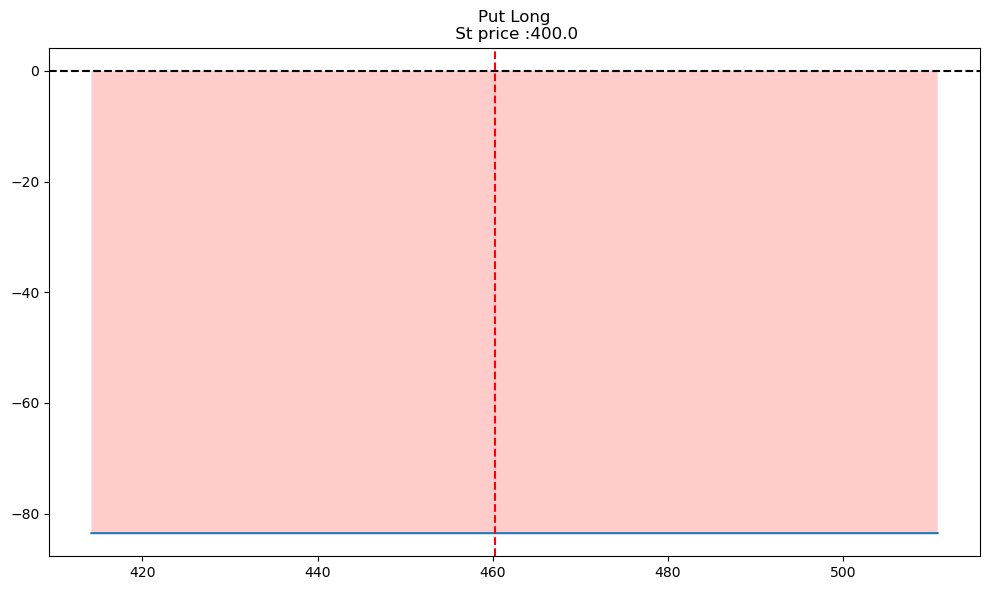

In [76]:
op.single_plotter(spot = s, strike = strike_value_input, op_type='p', tr_type='b', op_pr = put_value_manual)

## Selling put option

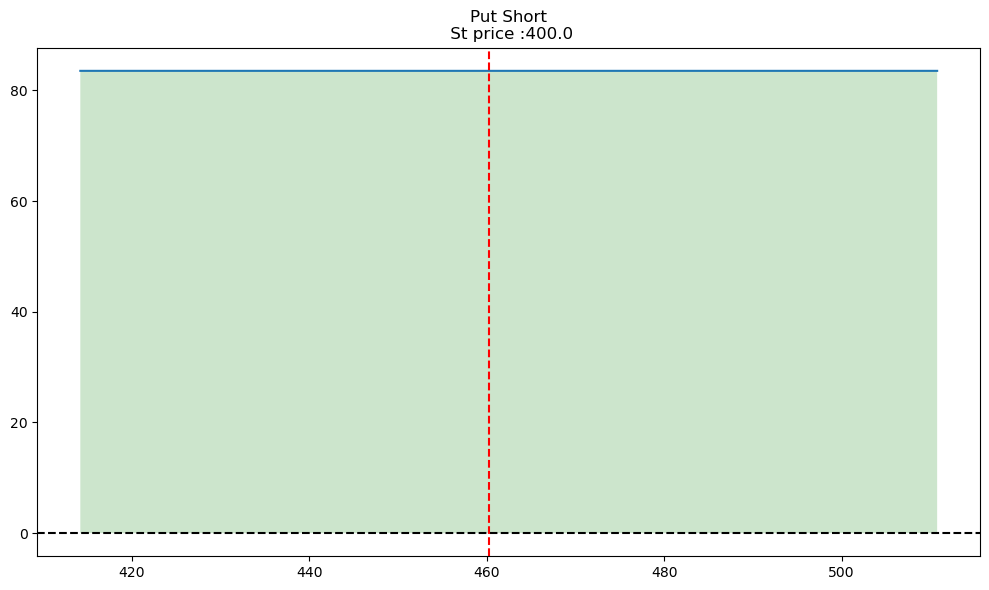

In [77]:
op.single_plotter(spot = s, strike = strike_value_input, op_type='p', tr_type='s', op_pr = put_value_manual)

## Buying call option

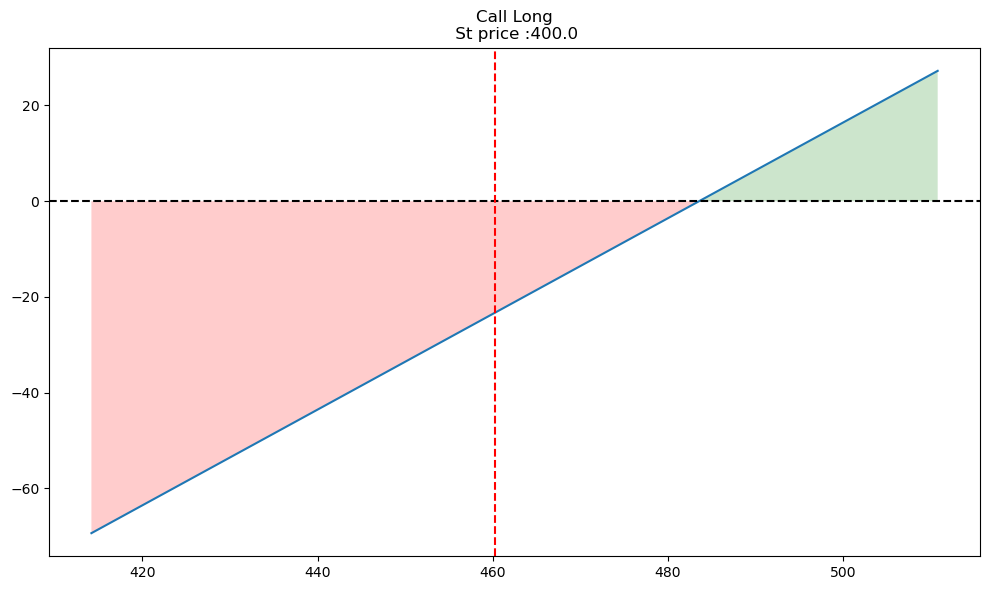

In [78]:
op.single_plotter(spot = s, strike = strike_value_input, op_type='c', tr_type='b', op_pr = put_value_manual)

## Selling call option

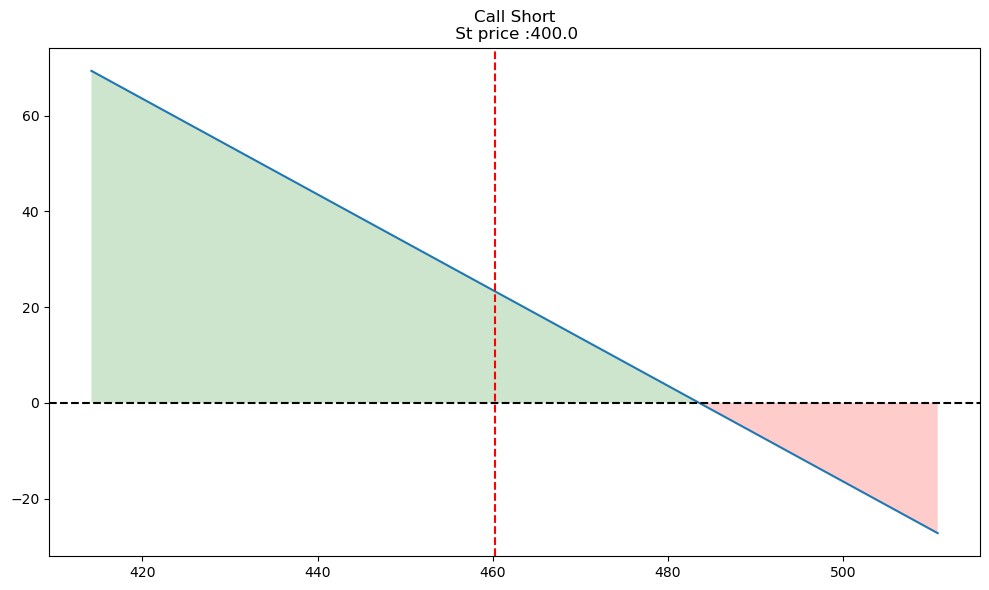

In [79]:
op.single_plotter(spot = s, strike = strike_value_input, op_type='c', tr_type='s', op_pr = put_value_manual)

## Debugging:

**Inputs to opstrat are in this format:**

strike_price = 400.0

spot_price = 460.2

riskfree_rate = 1.96

time_to_expiry = 109.0

volatility = 44.6325


**Inputs to pyvollib are in this format:**

print(, , , , )

strike_price_py_vollib = 400.0

spot_price_py_vollib = 460.2

riskfree_rate_py_vollib = 0.0196

time_to_expiry_py_vollib = 0.29863013698630136

volatility_py_vollib = 0.446325

**Inputs to manual are in this format:**

print(,,,,)

s = 460.2

strike_value_input = 400.0

r = 0.0196

vol_new = 0.446325

t = 0.29863013698630136

In [80]:
    """
    Calculate d1 parameter for Black-Scholes formula.
    
    Parameters:
        spot_price (float): Current price of the underlying asset (spot price).
        strike_price (float): Strike price of the option.
        risk_free_rate (float): Annualized risk-free rate (as a decimal).
        volatility (float): Volatility of underlying asset's returns (annualized, as a decimal).
        time_to_expiry (float): Time until option's expiration (in years).
    
    Returns:
        float: d1 parameter.
    """

"\nCalculate d1 parameter for Black-Scholes formula.\n\nParameters:\n    spot_price (float): Current price of the underlying asset (spot price).\n    strike_price (float): Strike price of the option.\n    risk_free_rate (float): Annualized risk-free rate (as a decimal).\n    volatility (float): Volatility of underlying asset's returns (annualized, as a decimal).\n    time_to_expiry (float): Time until option's expiration (in years).\n\nReturns:\n    float: d1 parameter.\n"

# Appendix:

## Debugging theta discrepancy of manual calculation vs library:

Using the formula theory of calculating greek from this video:

https://www.youtube.com/watch?v=558k7D2alxM
        
and this video: https://www.youtube.com/watch?v=RHrbtnetLQg

I still had to change that formula to match the libraries. Don't know which formula is right?

## Extract duration

Doubt (not understanding requirement):

Duration is calculated 3 month, default value.

Or, it is calculated by assuming today, the option is going to expire? (Someone told me this, but don't remember who?)

Or, is it a user input?

Have coded all these approaches meanwhile. Will delete unnecessary approaches upon clarification.

In [81]:
# This below code is assuming duration from table header 

# def extract_duration(ticker):
    
#     df = pd.read_excel(excel_file_path, sheet_name = ticker)
    
#     # Check if "Ticker" is in the header row
#     if "Ticker" not in df.columns:
#         return "Ticker not found in header row."
    
#     # Extract headers containing "IMPVOL"
#     impvol_headers = [col for col in df.columns if "IMPVOL" in col]
    
#     # Obtaining duration from header
#     duration = (impvol_headers[0]).split("_")[0]
        
#     # Extract numeric characters from the string
#     numeric_part = int(''.join(filter(str.isdigit, input_string)))
    
#     # Assumed average trading days per month
#     average_trading_days_per_month = 21
    
#     # Calculate the total trading days
#     total_trading_days = numeric_part * average_trading_days_per_month
    
#     # Calculate annualized trading days
#     annualized_trading_days = total_trading_days/365
    
#     return annualized_trading_days

In [82]:
# This below code is assuming duration from today 

# def obtain_duration(date):
#     date_format = "%d-%m-%y"
#     input_date = datetime.strptime(date_string, date_format)
    
#     # Get the current date and time
#     current_date = datetime.now()
    
#     # Calculate the difference in days
#     days_difference = (current_date - input_date).days
    
#     return days_difference

## Trying to change #NAME code

In [83]:
# def fix_date(file_path, named_columns):
    
#     # Read the Excel file with the specified date format
#     df = pd.read_excel(file_path)
    
#     # Define the date format
#     date_format = "%d/%m/%Y"
    
#     # Convert the 'Date' column to the desired date format
#     df[named_columns] = pd.to_datetime(df[named_columns], format=date_format).dt.strftime(date_format)
    
#     # Save the cleaned DataFrame back to the Excel file
#     df.to_excel(file_path, index=False)

In [84]:
# fix_date(file_path, named_columns)

In [85]:
# import pandas as pd
# from dateutil.relativedelta import relativedelta

# def increment_month_by_one(date_str):
#     """Increment the month by one for a given date in the format 'DD/MM/YY'"""
#     day, month, year = map(int, date_str.split('/'))
#     month += 1
#     if month > 12:
#         month = 1
#         year += 1
#     return f"{day:02}/{month:02}/{year:02}"

# def replace_name_without_datetime(file_path):
#     # Load the workbook
#     with pd.ExcelFile(file_path) as xls:
#         # Create a dictionary to store modified dataframes
#         dfs = {}
        
#         # Iterate over all sheets
#         for sheet_name in xls.sheet_names:
#             df = pd.read_excel(file_path, sheet_name=sheet_name, dtype=str)
            
#             # Iterate over all cells
#             for col in df.columns:
#                 for row in range(df.shape[0]):
#                     cell_value = df.at[row, col]
                    
#                     # Check if the cell contains #NAME
#                     if cell_value == '#NAME':
#                         # Find the last valid date above this cell
#                         prev_date_str = None
#                         for prev_row in range(row-1, -1, -1):
#                             cell = df.at[prev_row, col]
#                             if '/' in cell and len(cell) == 8:  # Rough check for date format
#                                 prev_date_str = cell
#                                 break
                            
#                         # Add one month to the previous date string
#                         if prev_date_str:
#                             new_date_str = increment_month_by_one(prev_date_str)
#                             df.at[row, col] = new_date_str
            
#             # Store the modified dataframe
#             dfs[sheet_name] = df
    
#     # Save all modified dataframes back to the workbook
#     with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
#         for sheet_name, df in dfs.items():
#             df.to_excel(writer, sheet_name=sheet_name, index=False)

# replace_name_without_datetime("/path/to/your/excel/file.xlsx")

## pyblackscholesanalytics library - graphical implementation

In [86]:
# import pandas as pd

# from pyblackscholesanalytics.market.market import MarketEnvironment
# from pyblackscholesanalytics.options.options import PlainVanillaOption
# from pyblackscholesanalytics.plotter.plotter import OptionPlotter

# # Define your input parameters
# spot_price = s
# strike_price = k
# risk_free_rate = r
# volatility = vol
# time_to_expiry = t

# def option_factory(mkt_env, option_type):
#     return PlainVanillaOption(mkt_env, option_type=option_type)

# def get_time_parameter(option, kind='date'):
#     # date time-parameter
#     if kind == 'date':
#         # valuation date of the option
#         emission_date = option.get_t()
#         # emission/expiration date of the option
#         expiration_date = option.get_T()
#         # time-parameter as a date-range of 5 valuation dates between t and T-10d
#         time_parameter = pd.date_range(start=emission_date,
#                                        end=expiration_date - pd.Timedelta(days=20),
#                                        periods=5)
#     # time-to-maturity time parameter    
#     else:
#         # time-parameter as a list of times-to-maturity
#         time_parameter = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
#     return time_parameter

# def main():
#     # Create a MarketEnvironment instance with your input parameters
#     market_env = MarketEnvironment(
#         spot_price=spot_price,
#         strike_price=strike_price,
#         risk_free_rate=risk_free_rate,
#         volatility=volatility,
#         time_to_expiry=time_to_expiry
#     )
    
#     # define option type (only plain_vanilla)
#     opt_type = "call"  # "put"
#     option = option_factory(market_env, opt_type)
    
#     # option plotter instance
#     plotter = OptionPlotter(option)
    
#     # valuation date of the option
#     emission_date = option.get_t()
    
#     # select metrics to plot
#     for plot_metrics in ["price", "PnL", "delta", "theta", "gamma", "vega", "rho"]:
    
#         plot_details_flag = True if plot_metrics == "price" else False
    
#         # Plot at t
#         plotter.plot(t=[emission_date], plot_metrics=plot_metrics,
#                      plot_details=plot_details_flag)
    
#         # Plot at another date-string date
#         plotter.plot(t="01-06-2020", plot_metrics=plot_metrics,
#                      plot_details=plot_details_flag)
    
#         for time_kind in ['date', 'tau']:
#             # set time-parameter to plot
#             multiple_valuation_dates = get_time_parameter(option, kind=time_kind)
    
#             # Plot at multiple dates
#             plotter.plot(t=multiple_valuation_dates, plot_metrics=plot_metrics)

# # ----------------------------- usage example ---------------------------------#
# if __name__ == "__main__":
#     main()

In [87]:
# print("Summary")

# print("===============")

# print(f"\nTicker: {ticker}")

# print(f"Stock price: {s}")

# print(f"Strike price used in calculation finally: {strike_value_input}")

# print(f"Riskfree rate: {r}")

# print(f"Time left till expiration: {t}")

# print(f"Volatility: {vol_new}")

# print(f"\nValue of call option: {call_value}")

# print(f"d1 value: {d1_result}")

# print(f"d2 value: {d2_result}")

# print(f"n_d1 value: {n_d1_result}")

# print(f"n_d2 value: {n_d2_result}")

# print(f"Delta value for call option:", call_delta_manual)

# print(f"Gamma value for call option:", call_gamma_manual)

# print(f"Vega value for call option:", call_vega_manual)

# print(f"Theta value for call option:", call_theta_manual)

# print(f"Rho value for call option:", call_rho_manual)

# print(f"\nValue of put option: {put_value}")

# print(f"-d1 value: {negative_d1_result}")

# print(f"-d2 value: {negative_d2_result}")

# print(f"n_-d1 value: {n_negative_d1_result}")

# print(f"n_-d2 value: {n_negative_d2_result}")

# print(f"Delta value for put option:", put_delta_manual)

# print(f"Gamma value for put option:", put_gamma_manual)

# print(f"Vega value for put option:", put_vega_manual)

# print(f"Theta value for put option:", put_theta_manual)

# print(f"Rho value for put option:", put_rho_manual)

# print("\n===============")

# print("Other stats:")

# print(f"Strike price input by user initially: {strike_level_input}")

# print(f"Closest strike level (% of stock price) to be used by our system: {strike_level}")

# print(f"Strike value ($) based on user input: {strike_value_input}")

# print(f"Strike value ($) based on closest strike level: {final_strike_value}")

# print(f"Implied volatility header used in excel sheet: {volatility_header}")

# print(f"Volatility to be used: {vol_new}")